In [1]:
from Levenshtein import distance
import numpy as np
import json
dataset = [json.loads(line)for line in open("mrc_interpretation_A.txt").readlines()]


In [2]:
distance_mat = np.zeros((len(dataset),len(dataset)))
for i in range(len(dataset)):
    text1 = dataset[i]['context']
    for j,data in zip(range(i,len(dataset)),dataset[i:]):
        text2 = data['context']
        # normalize levenshtein distance
        distance_mat[i][j] = distance(text1,text2) / (len(text1)+len(text2))
        distance_mat[j][i] = distance_mat[i][j]

In [3]:
mat_ele = distance_mat.flatten()
print(len(mat_ele[mat_ele<0.46]))

13579


(array([1.6100e+02, 4.0000e+00, 2.0000e+00, 6.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 5.0000e+00, 6.0000e+00, 4.0000e+00,
        4.0000e+00, 3.0000e+00, 5.0000e+00, 5.0000e+00, 5.0000e+00,
        4.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 5.0000e+00,
        1.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        7.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00, 5.0000e+00,
        6.0000e+00, 1.4000e+01, 1.7000e+01, 1.2000e+01, 1.8000e+01,
        3.2000e+01, 3.0000e+01, 5.4000e+01, 5.5000e+01, 6.0000e+01,
        1.1400e+02, 1.2800e+02, 1.5200e+02, 2.7600e+02, 1.3280e+03,
        5.4590e+03, 1.2671e+04, 1.1991e+04, 1.0805e+04, 1.0261e+04,
        9.5960e+03, 9.3350e+03, 8.8040e+03, 8.6890e+03, 8.3070e+03,
        8.0260e+03, 7.4980e+03, 6.9650e+03, 6.4030e+03, 5.9670e+03,
        5.6010e+03, 4.9770e+03, 4.9720e+03, 4.39

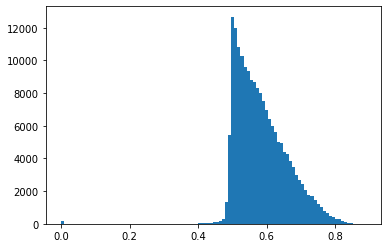

In [4]:
# the distribution of levenshtein distance
import matplotlib.pyplot as plt
plt.hist(mat_ele[:1855*100],bins=100)

In [5]:
fails = []
success = set()
threshold = 0.27 # setting the threshold to the 0.27
unpair_set = set()
paired_set = set()
from tqdm import tqdm
for i in tqdm(range(len(distance_mat))):
    pairs_index = np.where(distance_mat[i]<threshold)[0]
    if len(pairs_index) == 1 and i not in paired_set:
        unpair_set.add(i)
        continue
    mark = True
    # ensure all set are equal in one group
    for idx in pairs_index:
        dst = np.where(distance_mat[idx]<threshold)[0]
        # not equal drop the group use the human to check
        if len(dst) != len(pairs_index) or not (dst == pairs_index).all():
            fails.append((i,dst,pairs_index))
            mark = False
    if mark:
        success.add(tuple(pairs_index.tolist()))
        paired_set = paired_set.union(set(pairs_index))
    else:
        unpair_set.add(i)

full_set = set(list(range(len(dataset))))
done_set = unpair_set.union(paired_set)
assert done_set == full_set, print(full_set - done_set)
print(len(unpair_set))
print(len(fails))

100%|██████████| 1855/1855 [00:00<00:00, 27194.14it/s]

107
8


In [6]:
success = [list(suc) for suc in success]
success.sort(key=lambda x:x[0])
with open('pair.json','w') as f:
    for suc in success:
        f.write(json.dumps(suc)+'\n')

In [7]:
unpair_set = list(unpair_set)
unpair_set.sort()
human_checks2 = set()
human_checks1 = set()
for idx in unpair_set:
    print(idx)
    print(dataset[idx]['context'])
    dst = np.where(distance_mat[idx]<0.45)[0] # allivate the threhold get more match
    if len(dst) >= 2:
        human_checks2.add(tuple(dst.tolist()))
    else:
        # even worse
        # need human to find pairs for these data
        human_checks1.add(idx)
    print(json.dumps(dst.tolist()))
    print(json.dumps([dataset[j]['context'] for j in dst],indent=4,ensure_ascii=False))
    print()
human_checks2 = [list(suc) for suc in human_checks2]
human_checks2.sort(key=lambda x:x[0])
# human to check the pair is right or not
with open('human_2.json','w') as f:
    for suc in human_checks2:
        f.write(json.dumps(suc)+'\n')

31
网球运动的起源及演变可以用四句话来概括：网球孕育在法国，诞生在英国，开始普及和形成高潮在美国，现盛行全世界。
[31, 844]
[
    "网球运动的起源及演变可以用四句话来概括：网球孕育在法国，诞生在英国，开始普及和形成高潮在美国，现盛行全世界。",
    "网球与高尔夫、保龄球、桌球并称为世界四大绅士运动，他的起源可以追溯到12-13世纪的法国。网球运动的起源及演变可以用四句话来概括：网球孕育在法国，诞生在英国，开始普及和形成高潮在美国，现盛行全世界。"
]

45
《资治通鉴》(常简作《通鉴》)，由北宋司马光主编的一部多卷本编年体史书，共294卷，历时19年完成。主要以时间为纲，事件为目，从周威烈王二十三年(公元前403年)...
[45, 859]
[
    "《资治通鉴》(常简作《通鉴》)，由北宋司马光主编的一部多卷本编年体史书，共294卷，历时19年完成。主要以时间为纲，事件为目，从周威烈王二十三年(公元前403年)...",
    "《资治通鉴》(常简作《通鉴》)，由北宋司马光主编的一部多卷本编年体史书，共294卷，历时19年完成。编者总结出许多经验教训，供统治者借鉴，宋神宗认为此书“鉴于往事，有资于治道”，即以历史的得失作为鉴诫来加强统治，所以定名为《资治通鉴》。主要以时间为纲，事件为目，从周威烈王二十三年(公元前403年)..."
]

78
胡萝卜属，学名Daucus L. ，是伞形科的一属。一年生或二年生草本，根肉质。茎直立，有分枝。该属约60种，分布于欧洲、非洲、美洲和亚洲；我国有1种和1栽培变种。
[78, 903]
[
    "胡萝卜属，学名Daucus L. ，是伞形科的一属。一年生或二年生草本，根肉质。茎直立，有分枝。该属约60种，分布于欧洲、非洲、美洲和亚洲；我国有1种和1栽培变种。",
    "胡萝卜属，学名Daucus L. ，是伞形科的一属。一年生或二年生草本，根肉质。茎直立，有分枝。该属约60种，分布于欧洲、非洲、美洲和亚洲；原产亚洲西部，阿富汗,10世纪时经伊朗传入欧洲大陆，15世纪英国已有栽培，16世纪传入美国。12世纪经伊朗传入中国，日本在16世纪从中国引入。我国有1种和1栽培变种。"
]

100
亳州,别称焦邑、谯城,安徽省下辖地级市,位于安徽省西北部,全市总人口534万人。市辖区面积2226平

In [8]:
human_checks1

{215, 304, 440, 510, 532, 544, 1136, 1262, 1465, 1563, 1585, 1597}

In [9]:
human_checks1 = list(human_checks1)
human_checks1.sort()

for idx in human_checks1:
    print(idx)
    print(dataset[idx]['context'])
    dst = np.where(distance_mat[idx]<0.50)[0]
    print(json.dumps(dst.tolist()))
    print(json.dumps({str(j):dataset[j]['context'] for j in dst},indent=4,ensure_ascii=False))
    print()

215
弗里德里克·弗朗索瓦·肖邦 19世纪波兰作曲家、钢琴家主要作品有：钢琴协奏曲2首、钢琴三重奏、钢琴奏鸣曲3首、叙事曲4首。
[17, 46, 116, 146, 207, 215, 298, 301, 361, 392, 593, 632, 635, 687, 778, 826, 860, 1136, 1252, 1253, 1254, 1648, 1687, 1690, 1742, 1833]
{
    "17": "吴三桂(1612年-1678年10月2日)，字长伯，一字月所，明朝辽东人，明末清初著名政治军事人物，吴周政权建立者吴周太祖。",
    "46": "所处（所处）指所驻之地。 唐 韩愈 《黄家贼事宜状》：“其经略使若置在 邕州 ，与贼隔江对岸，兵镇所处，物力必全。",
    "116": "2003年，初中语文教科书中对“龙城飞将”的注释做出修改：“龙城”指奇袭龙城的名将卫青，而“飞将”则指威名赫赫的飞将军李广。",
    "146": "珍珠鸟作者简介冯骥才，当代作家，1942年生于天津，原籍浙江慈溪市人。从小喜爱美术、文学和球类活动。曾当过专业篮球运动员，从事过绘画。",
    "207": "《射雕英雄传》又名《大漠英雄传》，是“射雕三部曲”之一，下接《神雕侠侣》。《射雕英雄传》是金庸中期武侠小说创作的代表作品。",
    "215": "弗里德里克·弗朗索瓦·肖邦 19世纪波兰作曲家、钢琴家主要作品有：钢琴协奏曲2首、钢琴三重奏、钢琴奏鸣曲3首、叙事曲4首。",
    "298": "玫瑰花系蔷薇科落叶灌木植物，花紫红色，气味芳香。在中药中，别名有徘徊花、笔头花、刺玫花、赤蔷薇花。其性温，味甘，微苦；入肝脾二经。",
    "301": "马明哲，生于1955年12月，经济学博士。中南财经大学货币银行学博士。现任中国平安保险(集团)股份有限公司董事长兼CEO。",
    "361": "榆林市位于陕西省的最北部，在陕北黄土高原和毛乌素沙地南缘的交界处，也是黄土高原和内蒙古高原的过渡区，是国家级历史文化名城。",
    "392": "歌曲：不要怕歌手：杨光作词：一天 心月 作曲：张溪专辑：不要怕发行语言：国语 发行时间：2013-04-22 发行公司：欧乐文化。",
    "593": "河北五得利面粉集团有限公